<a href="https://colab.research.google.com/github/sjbaek12/sjbaek12.github.io/blob/master/%EC%96%91%EB%B0%A9%ED%96%A5_LSTM_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.xls to data.xls


In [ ]:
xlsx = pd.read_excel(r'data.xls')

In [ ]:
xlsx.tail()

,년/월/일,종가,대비,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
81,2020/05/11,"48,400",-400,"16,357,743","797,523,862,042","48,900","49,250","48,300","288,937,475","5,969,782,550"
82,2020/05/08,"48,800",0,"15,319,700","752,271,196,120","49,100","49,350","48,800","291,325,388","5,969,782,550"
83,2020/05/07,"48,800",-400,"13,884,411","679,668,516,460","49,200","49,300","48,700","291,325,388","5,969,782,550"
84,2020/05/06,"49,200",700,"18,070,225","882,453,648,920","49,000","49,200","48,500","293,713,301","5,969,782,550"
85,2020/05/04,"48,500","-1,500","26,083,749","1,270,816,552,521","48,900","49,100","48,500","289,534,454","5,969,782,550"


In [ ]:
xlsx = xlsx.rename(columns={"년/월/일" : "day", "종가":"close", "대비":"dif", "거래량(주)":"volume", "시가":"start", "고가":"high", "저가":"low"})

In [ ]:
xlsx.tail()

,day,close,dif,volume,start,high,low
81,2020/05/11,"48,400",-400,"16,357,743","48,900","49,250","48,300"
82,2020/05/08,"48,800",0,"15,319,700","49,100","49,350","48,800"
83,2020/05/07,"48,800",-400,"13,884,411","49,200","49,300","48,700"
84,2020/05/06,"49,200",700,"18,070,225","49,000","49,200","48,500"
85,2020/05/04,"48,500","-1,500","26,083,749","48,900","49,100","48,500"


In [ ]:
del xlsx["거래대금(원)"]
del xlsx["시가총액(백만)"]
del xlsx["상장주식수(주)"]

In [ ]:
sprice_s = xlsx[::-1]

In [ ]:
import numpy as np

In [ ]:
for i in range(0, len(sprice_s)):
  sprice_s.loc[i, 'close'] = float(sprice_s.loc[i, 'close'].replace(",", ''))
  sprice_s.loc[i, 'dif'] = float(sprice_s.loc[i, 'dif'].replace(",", ''))
  sprice_s.loc[i, 'volume'] = float(sprice_s.loc[i, 'volume'].replace(",", ''))
  sprice_s.loc[i, 'start'] = float(sprice_s.loc[i, 'start'].replace(",", ''))
  sprice_s.loc[i, 'high'] = float(sprice_s.loc[i, 'high'].replace(",", ''))
  sprice_s.loc[i, 'low'] = float(sprice_s.loc[i, 'low'].replace(",", ''))
 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scale_cols = ['close', 'dif', 'volume', 'start', 'high', 'low']
sprice_s = scaler.fit_transform(sprice_s[scale_cols])

In [ ]:
sprice_s = pd.DataFrame(sprice_s) 

In [ ]:
sprice_s.columns = scale_cols

In [ ]:
sprice_s[0:1]

,close,dif,volume,start,high,low
0,0.058296,0.163636,0.408246,0.126437,0.081301,0.110169


In [ ]:
print(scaler.inverse_transform(sprice_s[0:1])) # scale값을 역으로 변환한다.

[[ 4.8500000e+04 -1.5000000e+03  2.6083749e+07  4.8900000e+04
   4.9100000e+04  4.8500000e+04]]


In [ ]:
sprice_s.to_csv('new_file.txt')
files.download('new_file.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded = files.upload()

Saving new_file (8).txt to new_file (8) (1).txt


In [ ]:
data = pd.read_csv('new_file.txt')

In [ ]:
data

,Unnamed: 0,close,dif,volume,start,high,low
0,0,0.058296,0.163636,0.408246,0.126437,0.081301,0.110169
1,1,0.121076,0.563636,0.203619,0.134100,0.089431,0.110169
2,2,0.085202,0.363636,0.096733,0.149425,0.097561,0.127119
3,3,0.085202,0.436364,0.133384,0.141762,0.101626,0.135593
4,4,0.049327,0.363636,0.159890,0.126437,0.093496,0.093220
...,...,...,...,...,...,...,...
81,81,0.695067,0.290909,0.155775,0.693487,0.666667,0.711864
82,82,0.677130,0.400000,0.115514,0.678161,0.666667,0.694915
83,83,0.551570,0.181818,0.576462,0.670498,0.650407,0.576271
84,84,0.569507,0.472727,0.236633,0.524904,0.544715,0.584746


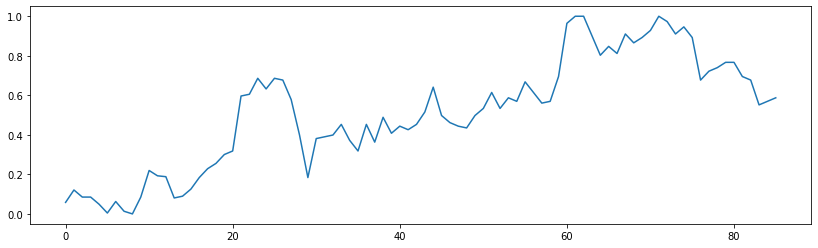

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.plot(data['close'])
plt.show()

In [ ]:
y_data = data.loc[0:85, 'close']  # y는 종가의 차이로 전날에 영향을 받는다고 가정한다

In [ ]:
y_data = np.array(y_data)

In [ ]:
price_serise=[]
for i in range(len(y_data)-4):
  price = [y_data[i], y_data[i+1], y_data[i+2], y_data[i+3], y_data[i+4]]
  price_serise.append(price)

In [ ]:
y = y_data[5:]
x = price_serise[:81]

print(y[0])
print(x[0])

0.004484304932734773
[0.05829596412556004, 0.12107623318385576, 0.08520179372197312, 0.08520179372197312, 0.049327354260089606]


In [ ]:
print(y[-1])
print(x[-1])

0.5874439461883405
[0.7668161434977572, 0.695067264573991, 0.6771300448430493, 0.551569506726457, 0.5695067264573987]


In [ ]:
x = np.array(x)
len(x)

81

In [ ]:
x = x.reshape(81,5,1)
y = y.reshape(81,1)

In [ ]:
y = np.array(y)
x_train = x[0:70]
x_val = x[70:]
y_train = y[0:70]
y_val = y[70:]

In [ ]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)


import tensorflow as tf

import numpy as np

from tensorflow import keras
import keras.layers as layers
from keras.layers import Dense, LSTM,Input, Bidirectional,Concatenate
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K 

In [ ]:
def policy_model_lstm (lr):
  inp_L = layers.Input(shape=(5,1))  # 타입스텝수 5개, 특성개수 1개
  dense_1 = Bidirectional(LSTM(5),merge_mode = 'concat')(inp_L)
  dense_2 = Dense(128)(dense_1) 
  dense_L = Dense(64)(dense_2) 
  output_s = layers.Dense(1)(dense_L)

  model_train = Model(inputs=inp_L, outputs = output_s)
  model_train.compile(loss='mse', optimizer=Adam(lr), metrics = ['mae'])
  return model_train

In [ ]:
model_train_test = policy_model_lstm(0.01)

In [ ]:
model_train_test.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10)                280       
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 10,009
Trainable params: 10,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_test = model_train_test.fit(x_train, y_train, validation_data = (x_val, y_val ),  epochs=100, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


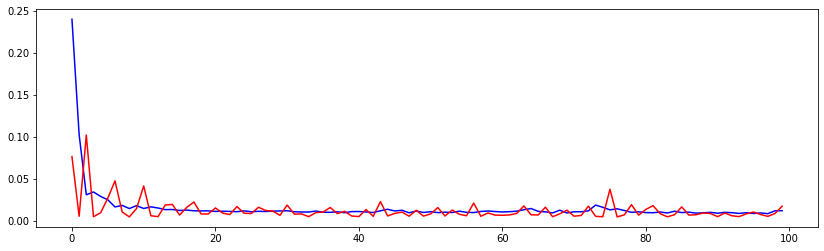

In [ ]:
plt.plot(history_test.history['loss'], 'b') 
plt.plot(history_test.history['val_loss'], 'r')
plt.show()

In [ ]:
y_hat = model_train_test.predict(x_val)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


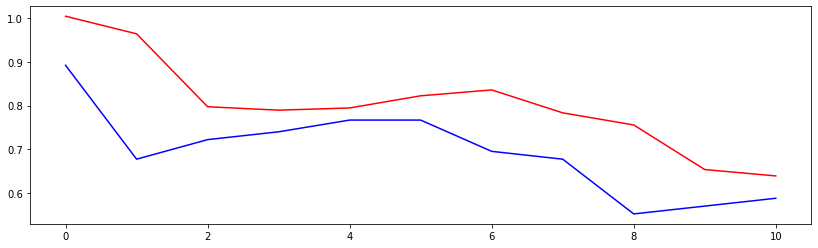

In [ ]:
plt.plot(y_hat, 'r') 
plt.plot(y_val, 'b')
plt.show()

Attention Model, 새로운 시도

In [ ]:
inp_L = layers.Input(shape=(5,1)) 
lstm = Bidirectional(LSTM(5,return_sequences = True))(inp_L)
lstm, forward_h, forward_c, backward_h, backward_c = Bidirectional(LSTM(5,return_sequences=True, return_state=True))(lstm)

순방향 LSTM의 은닉 상태와 셀상태를 forward_h, forward_c에 저장하고, 역방향 LSTM의 은닉 상태와 셀 상태를 backward_h, backward_c에 저장

In [ ]:
print(lstm.shape, forward_h.shape, forward_c.shape, backward_h.shape, backward_c.shape)

(None, 5, 10) (None, 5) (None, 5) (None, 5) (None, 5)


양방향 LSTM을 사용할 경우에는 순방향 LSTM과 역방향 LSTM 각각 은닉 상태와 셀 상태를 가지므로, 양방향 LSTM의 은닉 상태와 셀 상태를 사용하려면 두 방향의 LSTM의 상태들을 연결(concatenate)해주면 됩니다.

In [ ]:
state_h = Concatenate()([forward_h, backward_h]) # 은닉 상태
state_c = Concatenate()([forward_c, backward_c]) # 셀 상태

In [ ]:
print(state_h.shape, state_c.shape)

(None, 10) (None, 10)


In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = Dense(units)
    self.W2 = Dense(units)
    self.V = Dense(1)

  def call(self, values, query): # 단, key와 value는 같음
    # query shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # score 계산을 위해 뒤에서 할 덧셈을 위해서 차원을 변경해줍니다.
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention = BahdanauAttention(5) # 가중치 크기 정의
context_vector, attention_weights = attention(lstm, state_h)

In [ ]:
dense1 = Dense(20, activation="relu")(context_vector)
output = Dense(1, activation="sigmoid")(dense1)
model = Model(inputs=inp_L, outputs=output)

In [ ]:
model.compile(loss='mse', optimizer=Adam(0.01), metrics = ['mae'])

In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val ),  epochs=100, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


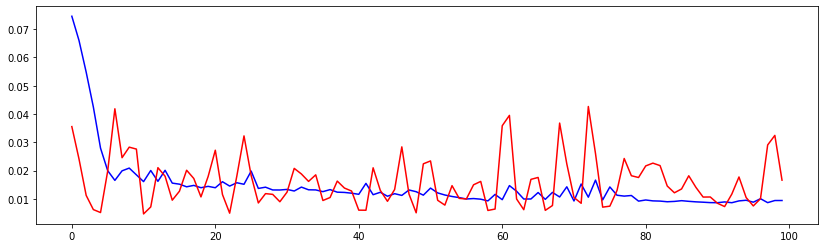

In [ ]:
plt.plot(history.history['loss'], 'b') 
plt.plot(history.history['val_loss'], 'r')
plt.show()

In [ ]:
y_hat = model.predict(x_val)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3350: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


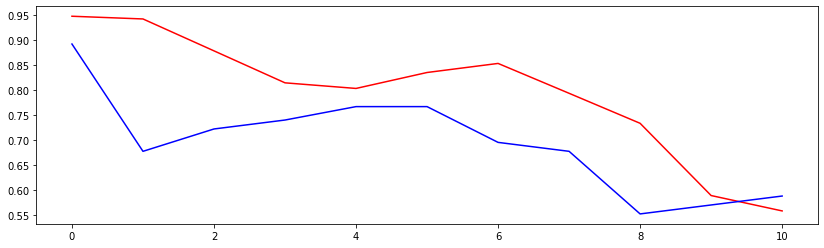

In [ ]:
plt.plot(y_hat, 'r') 
plt.plot(y_val, 'b')
plt.show()